In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/open?id=152gVd_8Rn6y-PIWpfFFMxGA0k127TslL'

In [ ]:
fluff, id = link.split('=')
print (id)

152gVd_8Rn6y-PIWpfFFMxGA0k127TslL


In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Consumer_Complaints.csv')  

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
fields= ['Product','Consumer complaint narrative']
data = pd.read_csv('Consumer_Complaints.csv', usecols=fields)
data = data[pd.notnull(data['Consumer complaint narrative'])]
data.columns = ['Product', 'Narrative']
data['category_id'] = data['Product'].factorize()[0]
category_id_data = data[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_data.values)
id_to_category = dict(category_id_data[['category_id', 'Product']].values)
data.head()

,Product,Narrative,category_id
1,Credit reporting,I have outdated information on my credit report that I have previously disputed that has yet to be removed this information is more then seven years old and does not meet credit reporting requirements,0
2,Consumer Loan,"I purchased a new car on XXXX XXXX. The car dealer called Citizens Bank to get a 10 day payoff on my loan, good till XXXX XXXX. The dealer sent the check the next day. When I balanced my checkbook on XXXX XXXX. I noticed that Citizens bank had taken the automatic payment out of my checking account at XXXX XXXX XXXX Bank. I called Citizens and they stated that they did not close the loan until XXXX XXXX. ( stating that they did not receive the check until XXXX. XXXX. ). I told them that I did not believe that the check took that long to arrive. XXXX told me a check was issued to me for the amount overpaid, they deducted additional interest. Today ( XXXX XXXX, ) I called Citizens Bank again and talked to a supervisor named XXXX, because on XXXX XXXX. I received a letter that the loan had been paid in full ( dated XXXX, XXXX ) but no refund check was included. XXXX stated that they hold any over payment for 10 business days after the loan was satisfied and that my check would be maile...",1
7,Credit reporting,"An account on my credit report has a mistaken date. I mailed in a debt validation letter to allow XXXX to correct the information. I received a letter in the mail, stating that Experian received my correspondence and found it to be "" suspicious '' and that "" I did n't write it ''. Experian 's letter is worded to imply that I am incapable of writing my own letter. I was deeply offended by this implication. \nI called Experian to figure out why my letter was so suspicious. I spoke to a representative who was incredibly unhelpful, She did not effectively answer any questions I asked of her, and she kept ignoring what I was saying regarding the offensive letter and my dispute process. I feel the representative did what she wanted to do, and I am not satisfied. It is STILL not clear to me why I received this letter. I typed this letter, I signed this letter, and I paid to mail this letter, yet Experian willfully disregarded my lawful request. \nI am disgusted with this entire situation,...",0
12,Debt collection,This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine.,2
16,Debt collection,"This complaint is in regards to Square Two Financial. Refer to CFPB case number XXXX regarding CACH, L. L. C. Square Two Financial has utilized my entire social security number to include date of birth on the pfd document listed with this complaint. The initial complaint was with CACH, L. L. C. and not Square Two Financial. This is in breach of the following : 1. Identity Theft Assumption and Deterrence Act of XXXX 2. Privacy Act of XXXX XXXX. Social Security XXXX 4. XXXX Privacy Act-which carries a maximum XXXX fine for each calendar cap year. \n5. Breach of Title XXXX, XXXX XXXX XXXX XXXX under XXXX and XXXX The solution is to have CACH, L.L.C handle this correction and not Square Two Financial. Two Square Financial submitted the XXXX XXXX XXXX with their subscriber name on the form listed on CFPB case # XXXX they are rendered liable in this matter. In addition, there is an account number associated with this Universal Data Form and they could use that account number instead of a...",2


In [ ]:
pd.set_option('max_colwidth', 1000)
data['Narrative'] = data['Narrative'].str.lower()
data.head()

,Product,Narrative,category_id
1,Credit reporting,i have outdated information on my credit report that i have previously disputed that has yet to be removed this information is more then seven years old and does not meet credit reporting requirements,0
2,Consumer Loan,"i purchased a new car on xxxx xxxx. the car dealer called citizens bank to get a 10 day payoff on my loan, good till xxxx xxxx. the dealer sent the check the next day. when i balanced my checkbook on xxxx xxxx. i noticed that citizens bank had taken the automatic payment out of my checking account at xxxx xxxx xxxx bank. i called citizens and they stated that they did not close the loan until xxxx xxxx. ( stating that they did not receive the check until xxxx. xxxx. ). i told them that i did not believe that the check took that long to arrive. xxxx told me a check was issued to me for the amount overpaid, they deducted additional interest. today ( xxxx xxxx, ) i called citizens bank again and talked to a supervisor named xxxx, because on xxxx xxxx. i received a letter that the loan had been paid in full ( dated xxxx, xxxx ) but no refund check was included. xxxx stated that they hold any over payment for 10 business days after the loan was satisfied and that my check would be maile...",1
7,Credit reporting,"an account on my credit report has a mistaken date. i mailed in a debt validation letter to allow xxxx to correct the information. i received a letter in the mail, stating that experian received my correspondence and found it to be "" suspicious '' and that "" i did n't write it ''. experian 's letter is worded to imply that i am incapable of writing my own letter. i was deeply offended by this implication. \ni called experian to figure out why my letter was so suspicious. i spoke to a representative who was incredibly unhelpful, she did not effectively answer any questions i asked of her, and she kept ignoring what i was saying regarding the offensive letter and my dispute process. i feel the representative did what she wanted to do, and i am not satisfied. it is still not clear to me why i received this letter. i typed this letter, i signed this letter, and i paid to mail this letter, yet experian willfully disregarded my lawful request. \ni am disgusted with this entire situation,...",0
12,Debt collection,this company refuses to provide me verification and validation of debt per my right under the fdcpa. i do not believe this debt is mine.,2
16,Debt collection,"this complaint is in regards to square two financial. refer to cfpb case number xxxx regarding cach, l. l. c. square two financial has utilized my entire social security number to include date of birth on the pfd document listed with this complaint. the initial complaint was with cach, l. l. c. and not square two financial. this is in breach of the following : 1. identity theft assumption and deterrence act of xxxx 2. privacy act of xxxx xxxx. social security xxxx 4. xxxx privacy act-which carries a maximum xxxx fine for each calendar cap year. \n5. breach of title xxxx, xxxx xxxx xxxx xxxx under xxxx and xxxx the solution is to have cach, l.l.c handle this correction and not square two financial. two square financial submitted the xxxx xxxx xxxx with their subscriber name on the form listed on cfpb case # xxxx they are rendered liable in this matter. in addition, there is an account number associated with this universal data form and they could use that account number instead of a...",2


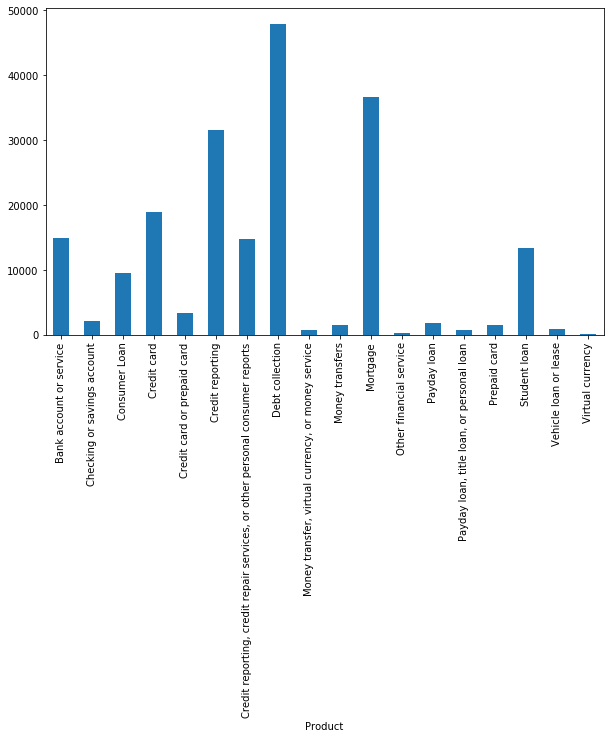

Shape of data(199970, 3)


In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
data.groupby('Product').Narrative.count().plot.bar(ylim=0)
plt.show()
print("Shape of data{}".format(data.shape))

In [ ]:
data.drop(data[data['Product']=='Virtual currency'].index , inplace=True)
data.drop(data[data['Product']=='Vehicle loan or lease'].index , inplace=True)
data.drop(data[data['Product']=='Prepaid card'].index , inplace=True)
data.drop(data[data['Product']=='Payday loan, title loan, or personal loan'].index , inplace=True)
data.drop(data[data['Product']=='Payday loan'].index , inplace=True)
data.drop(data[data['Product']=='Other financial service'].index , inplace=True)
data.drop(data[data['Product']=='Money transfers'].index , inplace=True)
data.drop(data[data['Product']=='Money transfer, virtual currency, or money service'].index , inplace=True)
data.drop(data[data['Product']=='Credit card or prepaid card'].index , inplace=True)
data.drop(data[data['Product']=='Checking or savings account'].index , inplace=True)
data.drop(data[data['Product']=='Credit reporting, credit repair services, or other personal consumer reports'].index , inplace=True)

NameError: ignored

In [ ]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172597 entries, 1 to 903982
Data columns (total 3 columns):
Product        172597 non-null object
Narrative      172597 non-null object
category_id    172597 non-null int64
dtypes: int64(1), object(2)
memory usage: 5.3+ MB


In [ ]:
data['Narrative'] = data['Narrative'].str.replace('xx', '')
data['Narrative'] = data['Narrative'].str.replace('/', '')
data['Narrative'] = data['Narrative'].str.replace('@', '')
data['Narrative'] = data['Narrative'].str.replace(r"\{.*?\}", '')
data.head()

,Product,Narrative,category_id
1,Credit reporting,i have outdated information on my credit report that i have previously disputed that has yet to be removed this information is more then seven years old and does not meet credit reporting requirements,0
2,Consumer Loan,"i purchased a new car on . the car dealer called citizens bank to get a 10 day payoff on my loan, good till . the dealer sent the check the next day. when i balanced my checkbook on . i noticed that citizens bank had taken the automatic payment out of my checking account at bank. i called citizens and they stated that they did not close the loan until . ( stating that they did not receive the check until . . ). i told them that i did not believe that the check took that long to arrive. told me a check was issued to me for the amount overpaid, they deducted additional interest. today ( , ) i called citizens bank again and talked to a supervisor named , because on . i received a letter that the loan had been paid in full ( dated , ) but no refund check was included. stated that they hold any over payment for 10 business days after the loan was satisfied and that my check would be mailed out on wed. the .. i questioned her about the delay in posting the dealer payment and ...",1
7,Credit reporting,"an account on my credit report has a mistaken date. i mailed in a debt validation letter to allow to correct the information. i received a letter in the mail, stating that experian received my correspondence and found it to be "" suspicious '' and that "" i did n't write it ''. experian 's letter is worded to imply that i am incapable of writing my own letter. i was deeply offended by this implication. \ni called experian to figure out why my letter was so suspicious. i spoke to a representative who was incredibly unhelpful, she did not effectively answer any questions i asked of her, and she kept ignoring what i was saying regarding the offensive letter and my dispute process. i feel the representative did what she wanted to do, and i am not satisfied. it is still not clear to me why i received this letter. i typed this letter, i signed this letter, and i paid to mail this letter, yet experian willfully disregarded my lawful request. \ni am disgusted with this entire situation, and...",0
12,Debt collection,this company refuses to provide me verification and validation of debt per my right under the fdcpa. i do not believe this debt is mine.,2
16,Debt collection,"this complaint is in regards to square two financial. refer to cfpb case number regarding cach, l. l. c. square two financial has utilized my entire social security number to include date of birth on the pfd document listed with this complaint. the initial complaint was with cach, l. l. c. and not square two financial. this is in breach of the following : 1. identity theft assumption and deterrence act of 2. privacy act of . social security 4. privacy act-which carries a maximum fine for each calendar cap year. \n5. breach of title , under and the solution is to have cach, l.l.c handle this correction and not square two financial. two square financial submitted the with their subscriber name on the form listed on cfpb case # they are rendered liable in this matter. in addition, there is an account number associated with this universal data form and they could use that account number instead of a ssn and dob which is against this is also includes removal of the ...",2


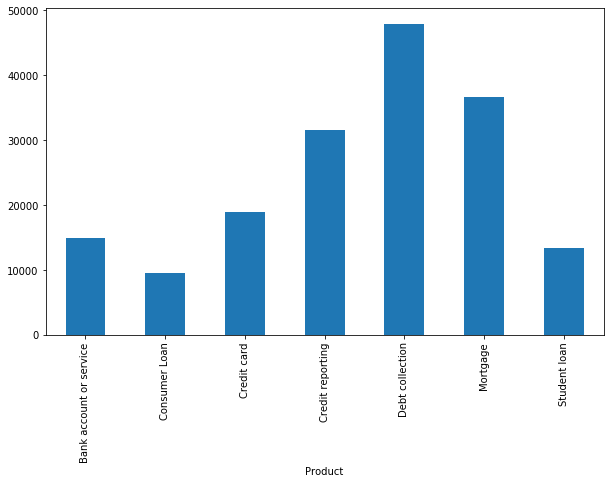

Shape of data(172597, 3)


In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
data.groupby('Product').Narrative.count().plot.bar(ylim=0)
plt.show()
print("Shape of data{}".format(data.shape))

In [ ]:
data['Product'].unique()

array(['Credit reporting', 'Consumer Loan', 'Debt collection', 'Mortgage',
       'Credit card', 'Bank account or service', 'Student loan'],
      dtype=object)

In [ ]:
import random
for i in range(38300):
  temp_data=data[data['Product']=='Debt collection'].index
  data.drop(random.choice(temp_data), inplace=True)
  
for i in range(27000):
  temp_data=data[data['Product']=='Mortgage'].index
  data.drop(random.choice(temp_data), inplace=True)

for i in range(21600):
  temp_data=data[data['Product']=='Credit reporting'].index
  data.drop(random.choice(temp_data), inplace=True)

for i in range(5000):
  temp_data=data[data['Product']=='Bank account or service'].index
  data.drop(random.choice(temp_data), inplace=True)

for i in range(9000):
  temp_data=data[data['Product']=='Credit card'].index
  data.drop(random.choice(temp_data), inplace=True)

for i in range(3500):
  temp_data=data[data['Product']=='Student loan'].index
  data.drop(random.choice(temp_data), inplace=True)

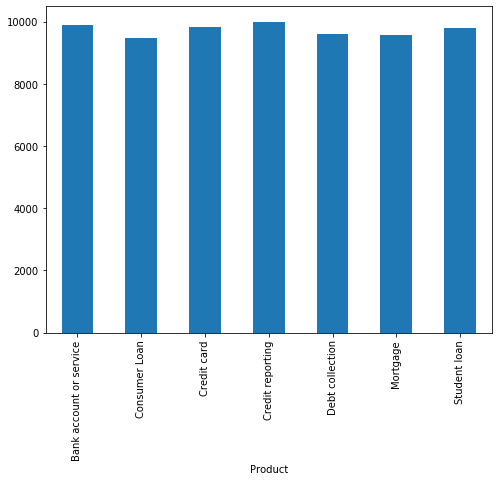

Shape of data(68197, 3)


In [ ]:
fig = plt.figure(figsize=(8,6))
data.groupby('Product').Narrative.count().plot.bar(ylim=0)
plt.show()
print("Shape of data{}".format(data.shape))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68197 entries, 2 to 903973
Data columns (total 3 columns):
Product        68197 non-null object
Narrative      68197 non-null object
category_id    68197 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.1+ MB


In [ ]:
data.to_csv('clean_dataset_final.csv')

In [ ]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [ ]:
data.to_csv('clean_dataset_final.csv')
!cp clean_dataset_final.csv drive/My\ Drive/